In [17]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import requests

from datetime import datetime
from citipy import citipy
from config import weather_api_key

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

648

In [18]:
url = "http://api.openweathermap.org/data/2.5/weather?q="
units = "Imperial"

# Create an empty list to hold the weather data
city_data = []
# Print the beginning of data loggin
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through al lthe cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 to stay under api call limit
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = f"{url}{city.replace(' ','%20')}&units={units}&APPID={weather_api_key}"
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except Exception:
        print("City not found. Skipping...")
        # traceback.print_exc()
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 
    

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | port hedland
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | mogok
Processing Record 4 of Set 1 | codrington
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | camana
Processing Record 8 of Set 1 | yomitan
City not found. Skipping...
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 11 of Set 1 | makat
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | inhambane
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | dunedin
Processing Record 20 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 21 of Set 1 | akdep

In [19]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Hedland,-20.3167,118.5667,78.85,94,96,5.75,AU,2022-02-02 21:22:12
1,Jamestown,42.0970,-79.2353,41.09,40,100,14.97,US,2022-02-02 21:15:23
2,Mogok,22.9167,96.5000,47.43,61,0,1.95,MM,2022-02-02 21:26:20
3,Codrington,-38.2667,141.9667,58.32,68,82,14.32,AU,2022-02-02 21:25:17
4,Butaritari,3.0707,172.7902,81.34,80,32,18.30,KI,2022-02-02 21:26:20
5,Port Alfred,-33.5906,26.8910,74.26,95,100,9.89,ZA,2022-02-02 21:21:45
6,Camana,-16.6228,-72.7111,74.46,73,48,9.35,PE,2022-02-02 21:26:21
7,Ushuaia,-54.8000,-68.3000,46.06,57,75,20.71,AR,2022-02-02 21:26:21
8,Makat,47.6469,53.3463,30.15,91,85,10.71,KZ,2022-02-02 21:26:22
9,Mar Del Plata,-38.0023,-57.5575,85.08,50,0,1.99,AR,2022-02-02 21:26:22


In [20]:
column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Hedland,AU,2022-02-02 21:22:12,-20.3167,118.5667,78.85,94,96,5.75
1,Jamestown,US,2022-02-02 21:15:23,42.0970,-79.2353,41.09,40,100,14.97
2,Mogok,MM,2022-02-02 21:26:20,22.9167,96.5000,47.43,61,0,1.95
3,Codrington,AU,2022-02-02 21:25:17,-38.2667,141.9667,58.32,68,82,14.32
4,Butaritari,KI,2022-02-02 21:26:20,3.0707,172.7902,81.34,80,32,18.30
5,Port Alfred,ZA,2022-02-02 21:21:45,-33.5906,26.8910,74.26,95,100,9.89
6,Camana,PE,2022-02-02 21:26:21,-16.6228,-72.7111,74.46,73,48,9.35
7,Ushuaia,AR,2022-02-02 21:26:21,-54.8000,-68.3000,46.06,57,75,20.71
8,Makat,KZ,2022-02-02 21:26:22,47.6469,53.3463,30.15,91,85,10.71
9,Mar Del Plata,AR,2022-02-02 21:26:22,-38.0023,-57.5575,85.08,50,0,1.99


In [22]:
output_data_file = 'weather_data/cities.csv'
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

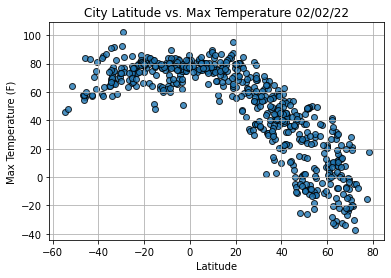

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

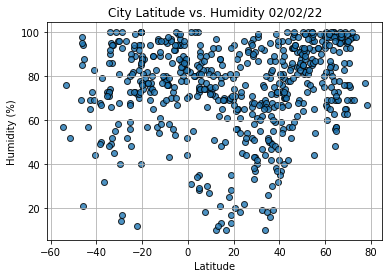

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

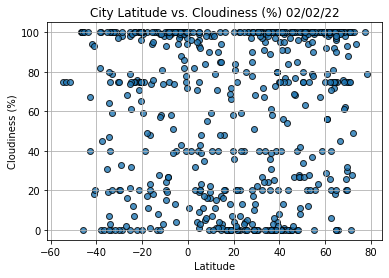

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

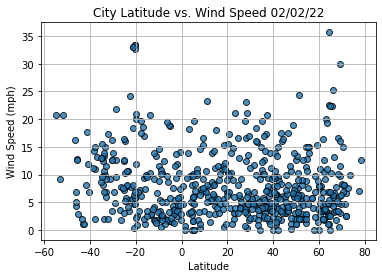

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

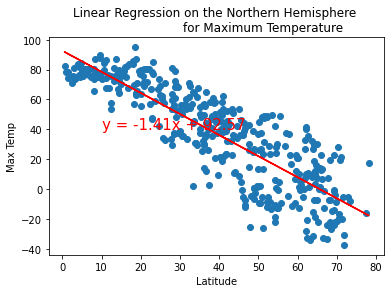

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for Maximum Temperature', 'Max Temp',(10,40))

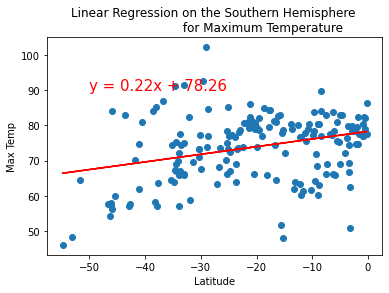

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for Maximum Temperature', 'Max Temp',(-50,90))

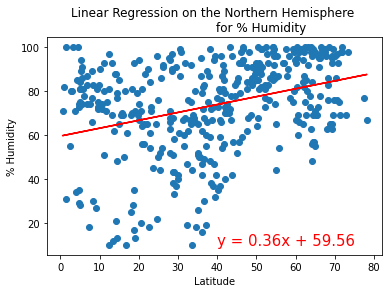

LinregressResult(slope=0.3587640432354732, intercept=59.562303629787706, rvalue=0.3376486671101519, pvalue=2.6074696246607895e-12, stderr=0.04969716288827701, intercept_stderr=2.1759889921166446)

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Humidity', '% Humidity',(40,10))
linregress(x_values, y_values)

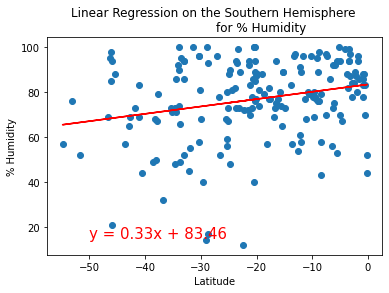

LinregressResult(slope=0.3275946755877994, intercept=83.45836217090067, rvalue=0.24739609363997503, pvalue=0.0006631831317193391, stderr=0.09458461688591402, intercept_stderr=2.294076759584493)

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Humidity', '% Humidity',(-50,15))
linregress(x_values, y_values)

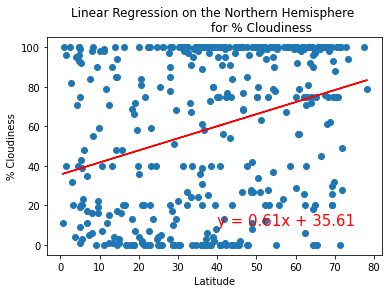

LinregressResult(slope=0.6105695858812702, intercept=35.611402155203585, rvalue=0.3080951551005769, pvalue=2.13046910356262e-10, stderr=0.09368404649793116, intercept_stderr=4.101953553661094)


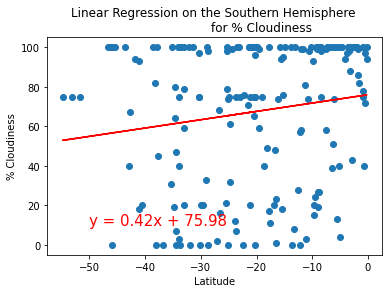

LinregressResult(slope=0.4215232710021256, intercept=75.97926618690377, rvalue=0.15575865292887697, pvalue=0.033760677100907716, stderr=0.19707309967695377, intercept_stderr=4.779855676251166)


In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Cloudiness', '% Cloudiness',(40,10))
print(linregress(x_values, y_values))

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Cloudiness', '% Cloudiness',(-50,10))
print(linregress(x_values, y_values))